In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
pd.set_option('html', False)
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")

# OZONO

## 9 de mayo 2015 16:00

Estaciones: Pedregal (PED)

In [4]:
CUA = (-99.291705, 19.365313)
SFE = (-99.262865, 19.357357)
PED = (-99.204136, 19.325146)
CCA = (-99.1761, 19.3262)

In [5]:
cua_ix = blt.near_coord_loc(xlong, xlat, CUA[0], CUA[1])
sfe_ix = blt.near_coord_loc(xlong, xlat, SFE[0], SFE[1])
ped_ix = blt.near_coord_loc(xlong, xlat, PED[0], PED[1])
cca_ix = blt.near_coord_loc(xlong, xlat, CCA[0], CCA[1])

In [6]:
cca_ix

(61, 33)

In [8]:
may_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/05/may_24.h5", 'r')
may_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/05/may_48.h5", 'r')

In [9]:
may_t_range = pd.date_range("2015-05-01 00:00:00", "2015-05-31 23:00:00", freq='1H')

In [10]:
vc_24 = np.array(may_24.get('vc_24h'))
pblh_24 = np.array(may_24.get('pblh_24h'))
u_mean_24 = np.array(may_24.get('u_mean_24h'))

In [11]:
vc_48 = np.array(may_48.get('vc_48h'))
pblh_48 = np.array(may_48.get('pblh_48h'))
u_mean_48 = np.array(may_48.get('u_mean_48h'))

Voy a genrar un DF con las series de tiempo para cada estación

### PED

In [12]:
A = blt.wrf2dataframe(vc_24, vc_48, may_t_range, ped_ix[0], ped_ix[1], 'PED_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, may_t_range, ped_ix[0], ped_ix[1], 'PED_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, may_t_range, ped_ix[0], ped_ix[1], 'PED_u_mean')

In [13]:
ped_DF_may = pd.concat([A,B,C], axis=1)

In [14]:
ped_DF_may.head()

                     PED_vc_24  PED_vc_48  PED_pblh_24  PED_pblh_48  \
2015-05-01 00:00:00         38       1712    30.367918   449.910339   
2015-05-01 01:00:00        116        862    55.942928   401.069366   
2015-05-01 02:00:00        130        837    60.609409   460.871765   
2015-05-01 03:00:00        328        639   100.231155   411.996582   
2015-05-01 04:00:00        255        459    78.020027   432.301880   

                     PED_u_mean_24  PED_u_mean_48  
2015-05-01 00:00:00       1.154282       3.776852  
2015-05-01 01:00:00       2.007922       2.153416  
2015-05-01 02:00:00       2.064292       1.822166  
2015-05-01 03:00:00       2.941425       1.492442  
2015-05-01 04:00:00       2.715460       1.062299  

In [15]:
ped_DF_may['PED_vc_24'].mean()

1563.1989247311828

In [16]:
ped_DF_may.between_time('08:00', '19:00')['PED_vc_24'].mean()

2620.4086021505377

In [17]:
ped_DF_may.between_time('07:00', '19:00')['PED_vc_24'].mean()

2428.5459057071962

In [18]:
ped_DF_may.between_time('07:00', '19:00')['PED_vc_24'].std()

1708.8844386408102

## gráficas

In [19]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = ped_DF_may.at_time(tt)['PED_vc_24'].mean()
    std_vc[t] = ped_DF_may.at_time(tt)['PED_vc_24'].std()

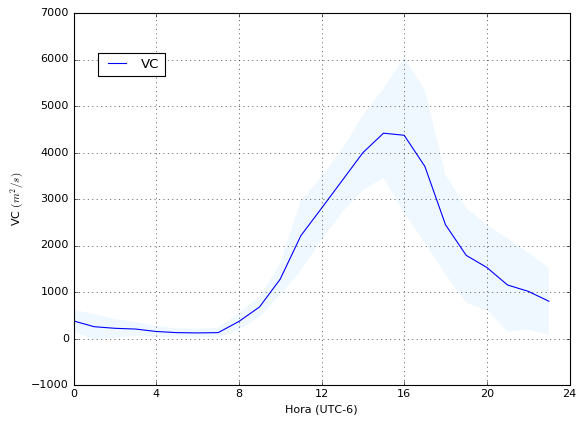

In [20]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

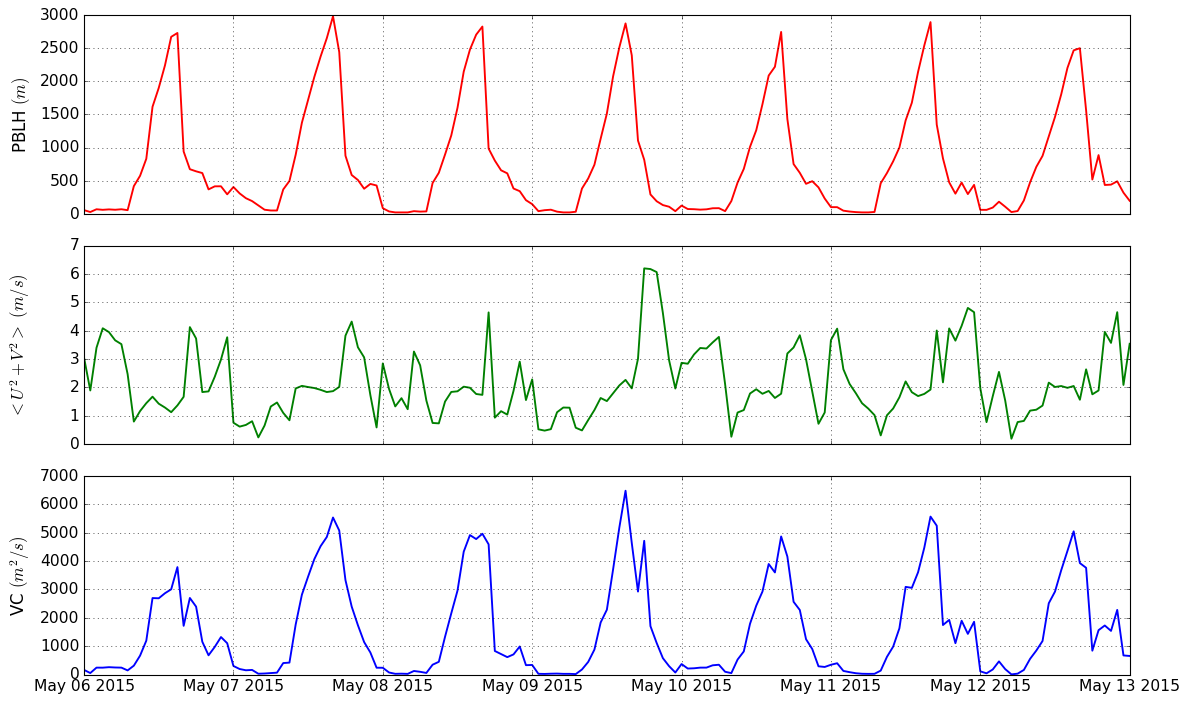

In [21]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(ped_DF_may["2015-05-06":"2015-05-13 00:00:00"]['PED_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(ped_DF_may["2015-05-06":"2015-05-13 00:00:00"]['PED_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(ped_DF_may["2015-05-06":"2015-05-13 00:00:00"]['PED_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

### CCA

In [22]:
A = blt.wrf2dataframe(vc_24, vc_48, may_t_range, cca_ix[0], cca_ix[1], 'CCA_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, may_t_range, cca_ix[0], cca_ix[1], 'CCA_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, may_t_range, cca_ix[0], cca_ix[1], 'CCA_u_mean')

In [23]:
cca_DF_may = pd.concat([A,B,C], axis=1)

In [24]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = cca_DF_may.at_time(tt)['CCA_vc_24'].mean()
    std_vc[t] = cca_DF_may.at_time(tt)['CCA_vc_24'].std()

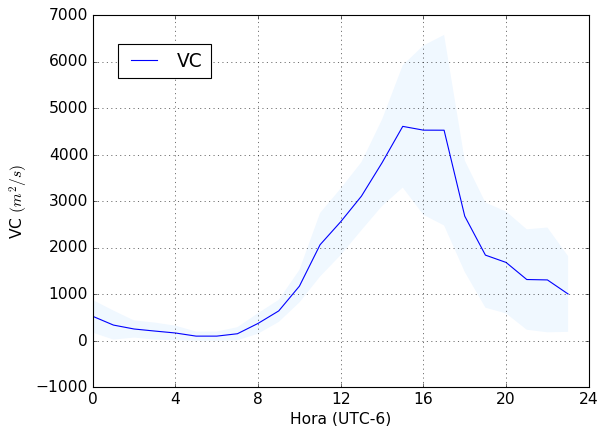

In [25]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

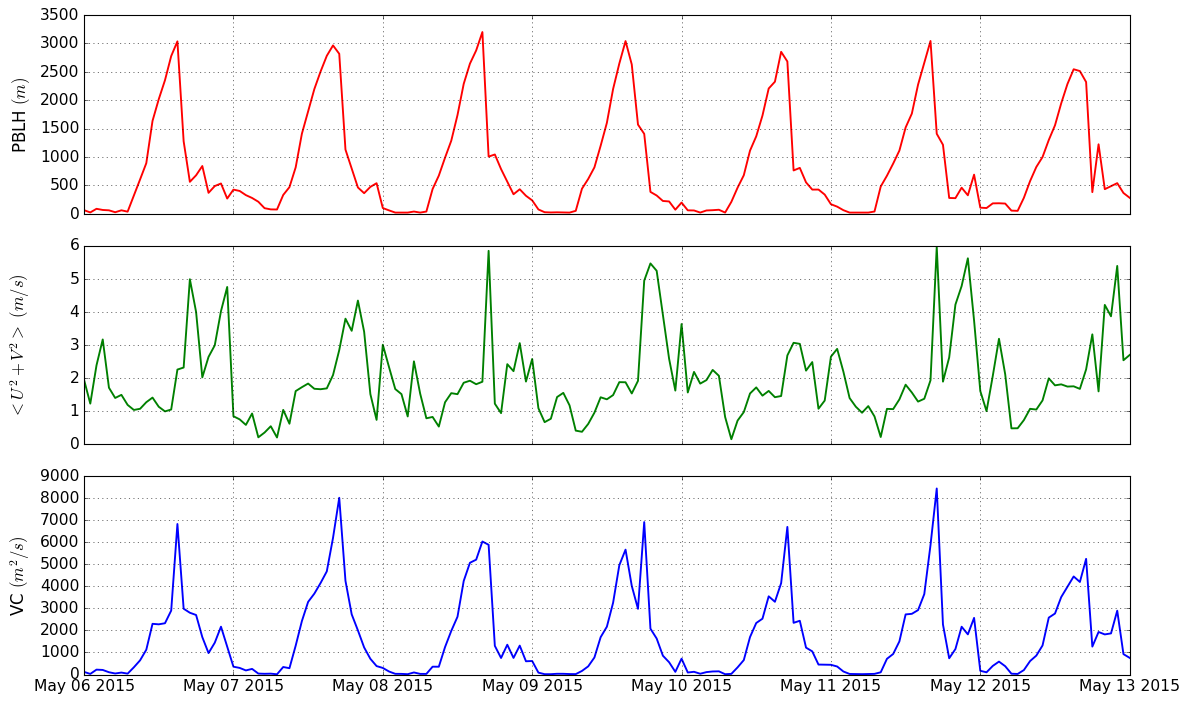

In [26]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(cca_DF_may["2015-05-06":"2015-05-13 00:00:00"]['CCA_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(cca_DF_may["2015-05-06":"2015-05-13 00:00:00"]['CCA_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(cca_DF_may["2015-05-06":"2015-05-13 00:00:00"]['CCA_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

## 10 de junio 2015 16:00

Estaciones: Pedregal (PED)

In [27]:
jun_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/06/jun_24.h5", 'r')
jun_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/06/jun_48.h5", 'r')

In [28]:
BEG = pd.date_range('2015-06-01 00:00:00', '2015-06-11 23:00:00', freq='1H')
ENDD = pd.date_range('2015-06-13 00:00:00', '2015-06-30 23:00:00', freq='1H')
jun_t_range = BEG.union(ENDD)

In [29]:
vc_24 = np.array(jun_24.get('vc_24h'))
pblh_24 = np.array(jun_24.get('pblh_24h'))
u_mean_24 = np.array(jun_24.get('u_mean_24h'))

In [30]:
vc_48 = np.array(jun_48.get('vc_48h'))
pblh_48 = np.array(jun_48.get('pblh_48h'))
u_mean_48 = np.array(jun_48.get('u_mean_48h'))

In [31]:
vc_24.shape

(29, 24, 102, 128)

In [32]:
A = blt.wrf2dataframe(vc_24, vc_48, jun_t_range, ped_ix[0], ped_ix[1], 'PED_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, jun_t_range, ped_ix[0], ped_ix[1], 'PED_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, jun_t_range, ped_ix[0], ped_ix[1], 'PED_u_mean')

In [33]:
ped_DF_jun = pd.concat([A,B,C], axis=1)

In [34]:
new_t_range = pd.date_range("2015-06-01 00:00:00", "2015-06-30 23:00:00", freq='1H')

In [35]:
ped_DF_jun = ped_DF_jun.reindex(new_t_range)

In [36]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = ped_DF_jun.at_time(tt)['PED_vc_24'].mean()
    std_vc[t] = ped_DF_jun.at_time(tt)['PED_vc_24'].std()

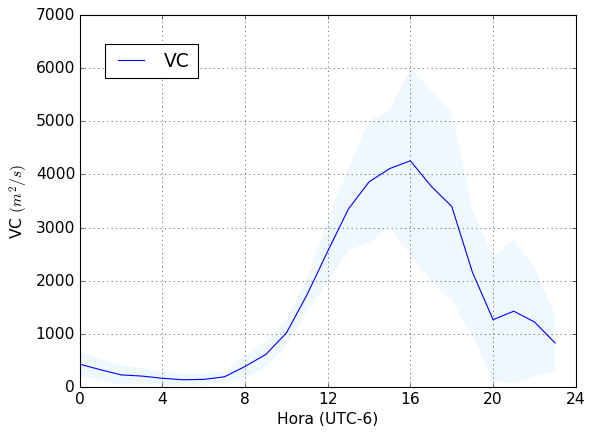

In [37]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

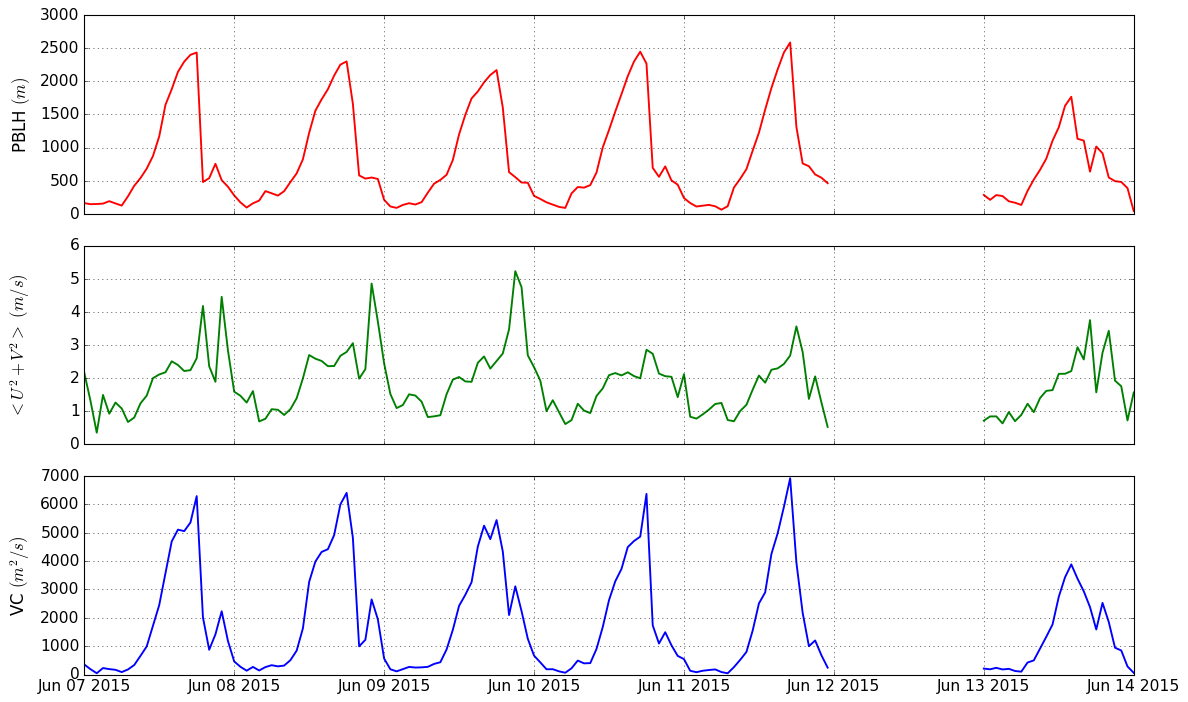

In [38]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(ped_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['PED_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(ped_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['PED_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(ped_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['PED_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

### CCA

In [39]:
A = blt.wrf2dataframe(vc_24, vc_48, jun_t_range, cca_ix[0], cca_ix[1], 'CCA_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, jun_t_range, cca_ix[0], cca_ix[1], 'CCA_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, jun_t_range, cca_ix[0], cca_ix[1], 'CCA_u_mean')

In [40]:
cca_DF_jun = pd.concat([A,B,C], axis=1)

In [41]:
cca_DF_jun = cca_DF_jun.reindex(new_t_range)

In [42]:
cca_DF_jun.between_time('07:00', '19:00')['CCA_pblh_24'].mean()

1179.103411585962

In [43]:
cca_DF_jun.between_time('07:00', '19:00')['CCA_pblh_24'].std()

685.57529062238746

In [44]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = cca_DF_jun.at_time(tt)['CCA_vc_24'].mean()
    std_vc[t] = cca_DF_jun.at_time(tt)['CCA_vc_24'].std()

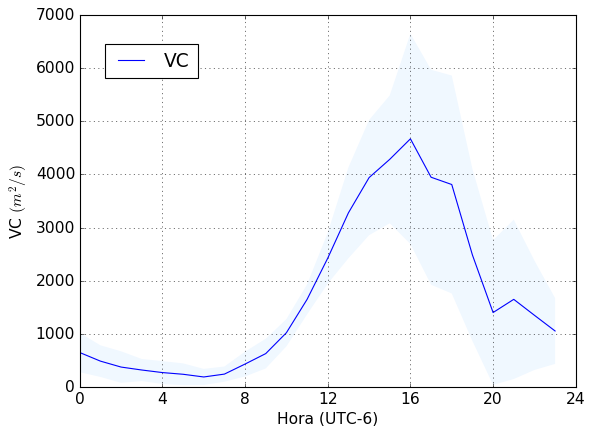

In [45]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

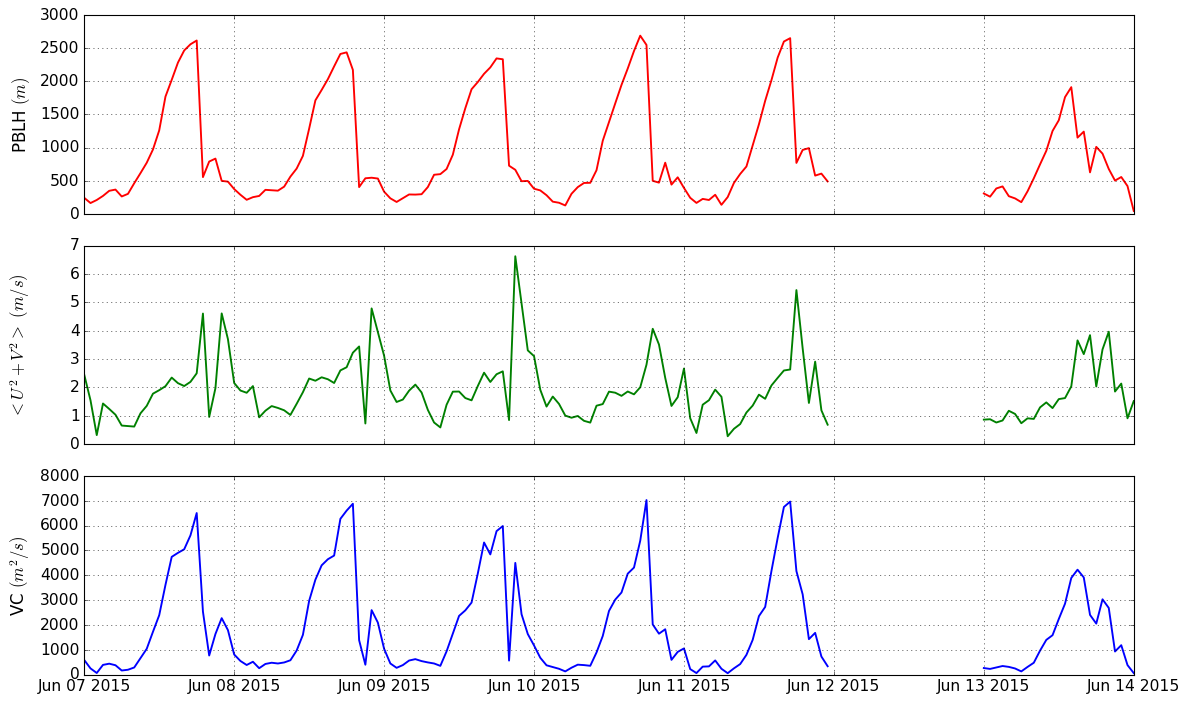

In [46]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(cca_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['CCA_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(cca_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['CCA_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(cca_DF_jun["2015-06-07":"2015-06-14 00:00:00"]['CCA_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

# Marzo

In [47]:
mar_24 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/03/mar_24.h5", 'r')
mar_48 = h5py.File("/Volumes/BUFFALO_SOLDIER/datos_VC/03/mar_48.h5", 'r')

In [48]:
mar_t_range = pd.date_range("2015-03-01 00:00:00", "2015-03-31 23:00:00", freq='1H')

In [49]:
vc_24 = np.array(mar_24.get('vc_24h'))
pblh_24 = np.array(mar_24.get('pblh_24h'))
u_mean_24 = np.array(mar_24.get('u_mean_24h'))
vc_48 = np.array(mar_48.get('vc_48h'))
pblh_48 = np.array(mar_48.get('pblh_48h'))
u_mean_48 = np.array(mar_48.get('u_mean_48h'))

## PED

In [50]:
A = blt.wrf2dataframe(vc_24, vc_48, mar_t_range, ped_ix[0], ped_ix[1], 'PED_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, mar_t_range, ped_ix[0], ped_ix[1], 'PED_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, mar_t_range, ped_ix[0], ped_ix[1], 'PED_u_mean')

In [51]:
ped_DF_mar = pd.concat([A,B,C], axis=1)

In [52]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = ped_DF_mar.at_time(tt)['PED_vc_24'].mean()
    std_vc[t] = ped_DF_mar.at_time(tt)['PED_vc_24'].std()

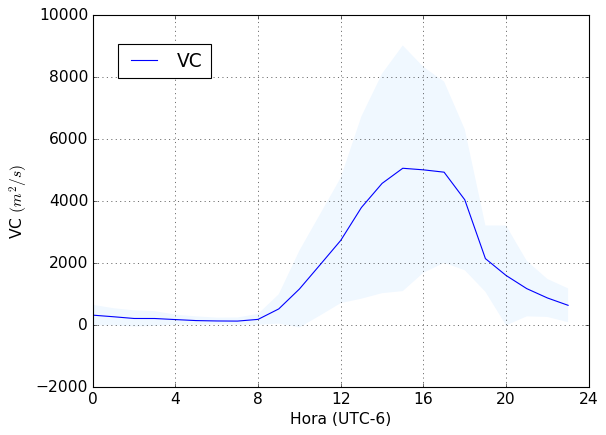

In [53]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

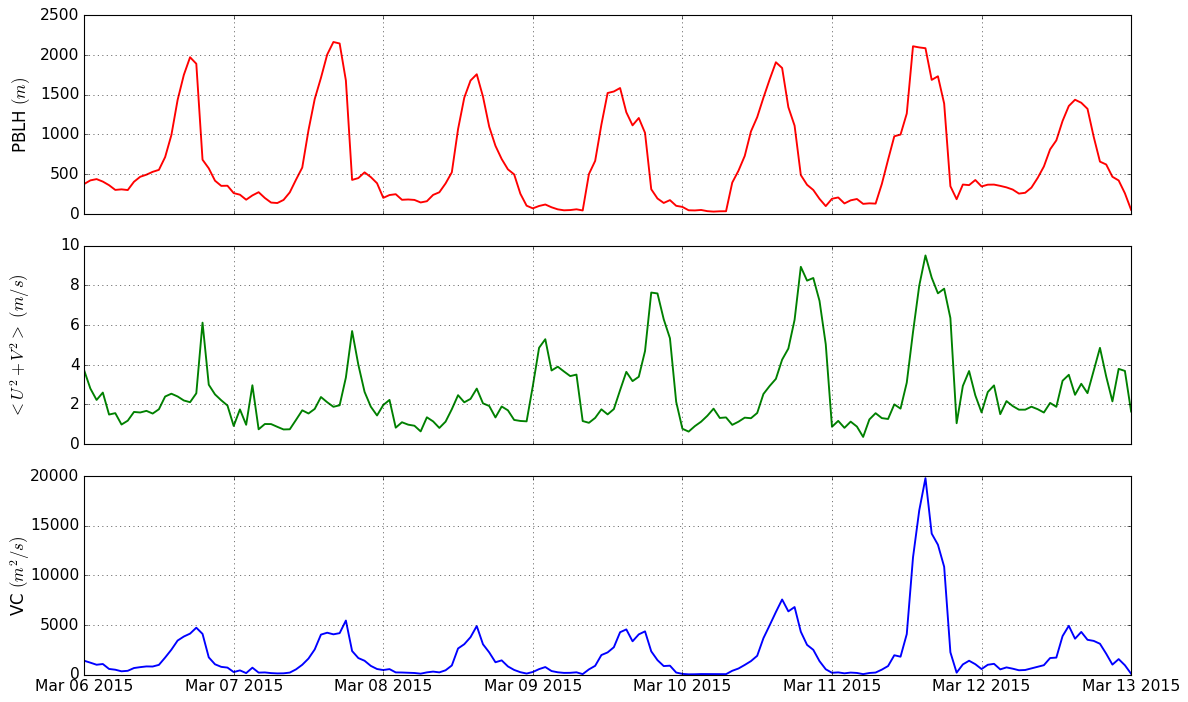

In [54]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(ped_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['PED_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(ped_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['PED_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(ped_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['PED_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

## CCA

In [55]:
A = blt.wrf2dataframe(vc_24, vc_48, mar_t_range, cca_ix[0], cca_ix[1], 'cca_vc')
B = blt.wrf2dataframe(pblh_24, pblh_48, mar_t_range, cca_ix[0], cca_ix[1], 'cca_pblh')
C = blt.wrf2dataframe(u_mean_24, u_mean_48, mar_t_range, cca_ix[0], cca_ix[1], 'cca_u_mean')

In [56]:
cca_DF_mar = pd.concat([A,B,C], axis=1)

In [57]:
mean_vc = np.zeros(24)
std_vc = np.zeros(24)
for t in range(0, 24):
    tt = str(t) + ':00'
    mean_vc[t] = cca_DF_mar.at_time(tt)['cca_vc_24'].mean()
    std_vc[t] = cca_DF_mar.at_time(tt)['cca_vc_24'].std()

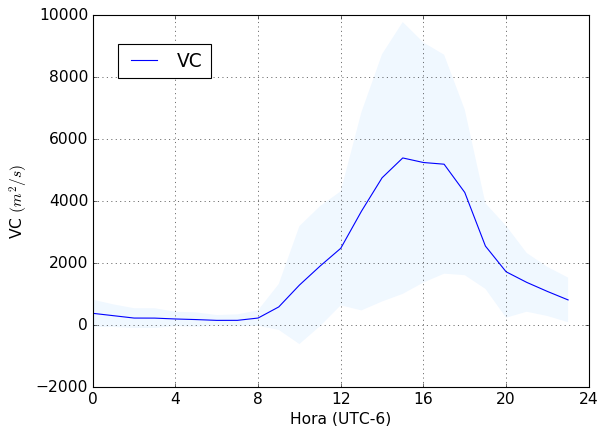

In [58]:
h_range= range(0,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, mean_vc - std_vc, mean_vc + std_vc, facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, mean_vc, label = 'VC')
plt.ylabel('VC $(m^2/s)$')
plt.xlabel('Hora (UTC-6)')
plt.grid()
plt.xlim((0,24))
#plt.ylim((0,3500))
plt.xticks(range(0,25,4))
plt.legend(loc=(0.05,0.83))

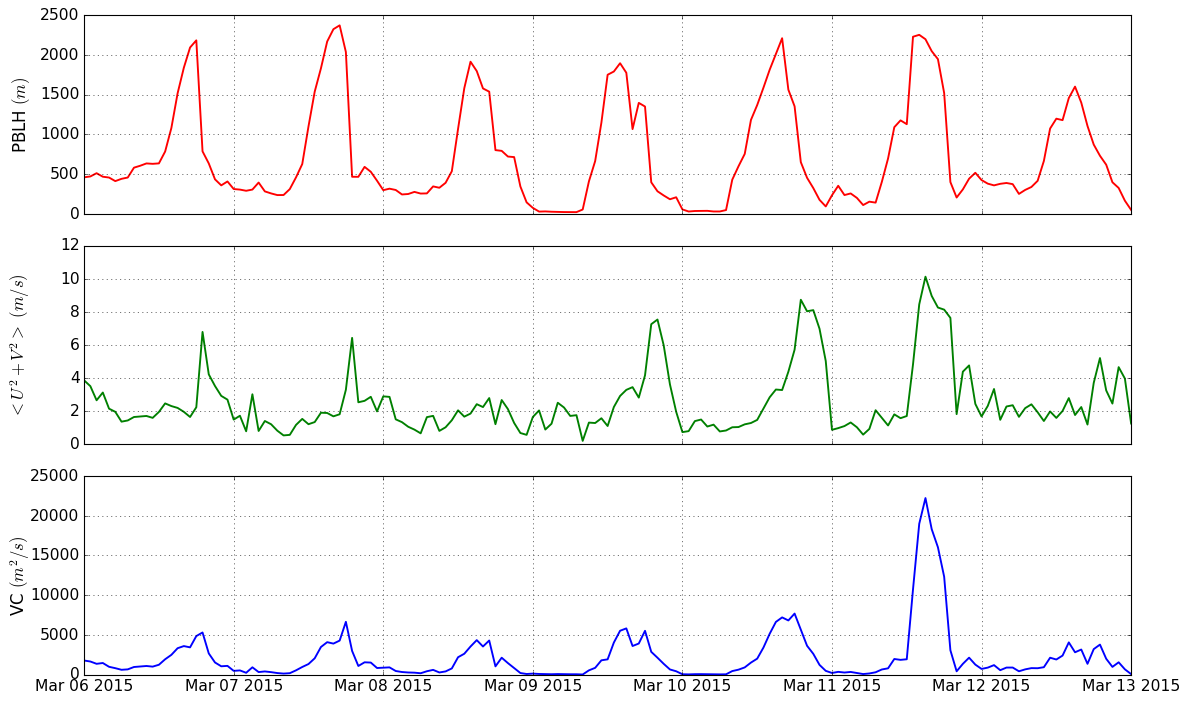

In [59]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(311)
#ax1.axvspan("2015-03-09 16:00:00","2015-03-10 18:00:00", alpha=0.5, color='red')
ax1.plot(cca_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['cca_pblh_24'], color = 'red', linewidth = 1.7)
#ax1.spines["top"].set_visible(False)
#ax1.spines["right"].set_visible(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('PBLH $(m)$',  fontsize = 15)
ax1.get_yaxis().set_label_coords(-0.05,0.5)

plt.grid()

ax2 = fig.add_subplot(312, sharex = ax1)
ax2.plot(cca_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['cca_u_mean_24'], color = 'green', linewidth = 1.7)
#ax2.spines["top"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('$<U^2 + V^2>$ $(m/s)$',  fontsize = 15)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
plt.grid()

ax3 = fig.add_subplot(313, sharex = ax1)
ax3.plot(cca_DF_mar["2015-03-06":"2015-03-13 00:00:00"]['cca_vc_24'], color = 'blue',linewidth = 1.7)
#ax3.spines["top"].set_visible(False)
#ax3.spines["right"].set_visible(False)
plt.grid()
plt.ylabel('VC $(m^2/s)$', fontsize = 15)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
plt.rcParams.update({'font.size': 14})
#plt.xticks(rotation=90)
fig.tight_layout()

# anual

In [ ]:
anual = pd.readcsv()